In [1]:
from konlpy.tag import Hannanum
import pandas as pd
han = Hannanum()
df = pd.read_csv('c:/data/text/군집분석데이터.csv', encoding="ms949")
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [2]:
docs = []
# 명사만 추출
for i in df['기사내용']:
    docs.append(han.nouns(i))

# 명사들 사이에 공백을 붙여서 열거
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
print(docs[0])

유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성


In [3]:
#BOW를 이용한 문서-단어 행렬 생성
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
#클러스터링
from sklearn.cluster import KMeans
# 군집 개수를 3으로 설정
kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)
print(kmeans.labels_)

[1 1 1 1 1 1 0 0 0 0 2 2 2 2 2]


In [5]:
#플로팅을 위해 PCA를 이용해 2차원으로 축소
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data=components, columns=['component1', 'component2'])
df3.index = df['검색어']
df3.head()

,component1,component2
검색어,,
유한양행,-2.245408,-4.167447
유한양행,-3.613940,-9.898629
유한양행,-2.932638,-7.159346
유한양행,-2.142776,-3.757097
유한양행,-3.397887,-8.904249


In [7]:
kmeans.labels_ == 0

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False])

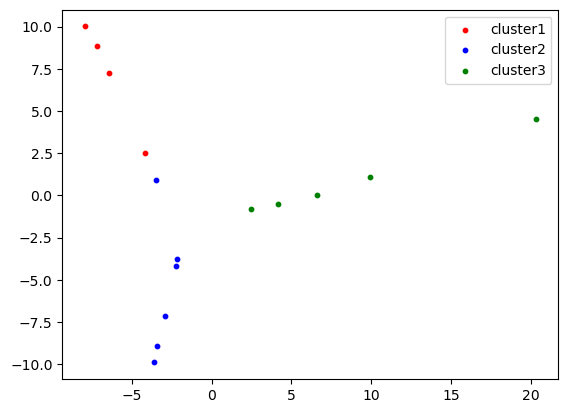

In [8]:
#x축: first, y축: second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], df3.iloc[kmeans.labels_ == 0, 1], 
            s=10, c='red', label='cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], df3.iloc[kmeans.labels_ == 1, 1], 
            s=10, c='blue', label='cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], df3.iloc[kmeans.labels_ == 2, 1], 
            s=10, c='green', label='cluster3')
plt.legend()
plt.show()

In [9]:
#TF-IDF를 이용한 문서-단어 행렬 생성
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0.0,0.0,0.0,0.000000,0.182407,0.000000,0.141350,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.072612,0.000000,0.000000,0.072612,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.080221,0.000000,0.103522,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.155423,0.000000,0.000000,0.000000,0.200569,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.068982,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089019,0.0


In [10]:
#클러스터링
from sklearn.cluster import KMeans
# 군집 개수를 3으로 설정
kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [11]:
#플로팅을 위해 PCA를 이용해 2차원으로 축소
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data=components, columns=['component1', 'component2'])
df3.index = df['검색어']
df3.head()

,component1,component2
검색어,,
유한양행,0.465439,-0.274275
유한양행,0.564050,-0.349902
유한양행,0.448806,-0.279217
유한양행,0.454605,-0.266479
유한양행,0.482336,-0.285219


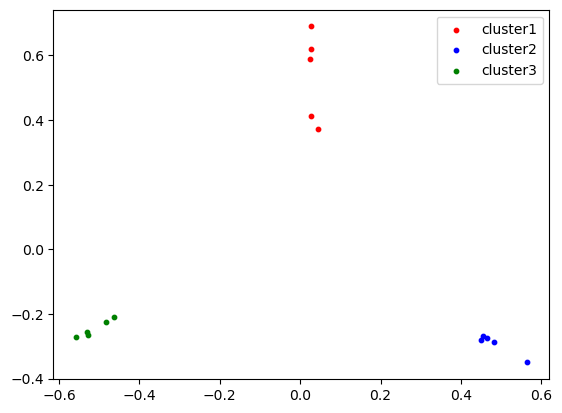

In [13]:
#시각화
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], df3.iloc[kmeans.labels_ == 0, 1], 
            s=10, c='red', label='cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], df3.iloc[kmeans.labels_ == 1, 1], 
            s=10, c='blue', label='cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], df3.iloc[kmeans.labels_ == 2, 1], 
            s=10, c='green', label='cluster3')
plt.legend()
plt.show()